STEP1

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

STEP2

In [2]:
df= pd.read_csv('diabetes (1).csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


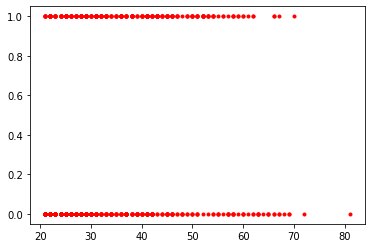

In [3]:
plt.scatter(df.Age,df.Outcome,marker='.',color='red')

In [4]:
#there is no individual above 72 who has diabetes;
#the standard deviation of bmi is much larger for clients who have diabetes;
#age has a considerable positive skewness, especially...................
#But how can we predict whether a client died, given his age? We'll do just that by fitting a logistic curve.

<AxesSubplot: xlabel='BMI', ylabel='Outcome'>

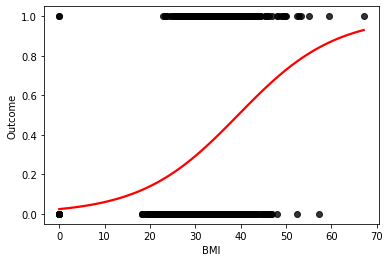

In [5]:
x = df['BMI']
y = df['Outcome']
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<AxesSubplot: xlabel='Glucose', ylabel='Outcome'>

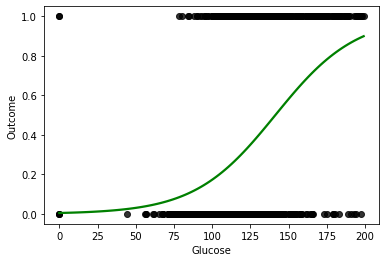

In [6]:
x = df['Glucose']
y = df['Outcome']
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'green'})

STEP3

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df[['BMI']],df.Outcome,test_size=0.1)

In [18]:
X_train.head(5)

,BMI
613,32.5
213,42.6
36,33.2
270,45.6
242,25.6


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(691, 1)
(77, 1)
(691,)
(77,)


In [10]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
print(f'\u03B20 , \u03B21 and \u03B22 are {logreg_model.intercept_} and {logreg_model.coef_}')

β0 , β1 and β2 are [-3.72206585] and [[0.09382918]]


In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
predictions = logreg_model.predict(X_test)
predictions


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
logreg_model.score(X_test,y_test)

0.6363636363636364

In [14]:
logreg_model.predict_proba(X_test)

array([[0.81308256, 0.18691744],
       [0.1357101 , 0.8642899 ],
       [0.41335322, 0.58664678],
       [0.50864394, 0.49135606],
       [0.50629874, 0.49370126],
       [0.35141114, 0.64858886],
       [0.57378256, 0.42621744],
       [0.65364178, 0.34635822],
       [0.67456715, 0.32543285],
       [0.83223162, 0.16776838],
       [0.71242492, 0.28757508],
       [0.72755521, 0.27244479],
       [0.76650455, 0.23349545],
       [0.70271831, 0.29728169],
       [0.53672728, 0.46327272],
       [0.63645777, 0.36354223],
       [0.65576295, 0.34423705],
       [0.64509656, 0.35490344],
       [0.52036218, 0.47963782],
       [0.71815726, 0.28184274],
       [0.47114522, 0.52885478],
       [0.69680453, 0.30319547],
       [0.9763871 , 0.0236129 ],
       [0.78446695, 0.21553305],
       [0.85216119, 0.14783881],
       [0.72194   , 0.27806   ],
       [0.62333434, 0.37666566],
       [0.68881723, 0.31118277],
       [0.47816421, 0.52183579],
       [0.23411849, 0.76588151],
       [0.

STEP4

In [15]:
cm= confusion_matrix(y_test,predictions) 
cm 

array([[42,  4],
       [24,  7]], dtype=int64)

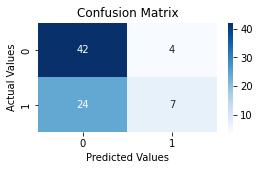

In [16]:
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(4,2))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [17]:
#accuracy=49/77 = 0.64